<h1 style = "text-align: center">ISAT341- Machine Learning and Data Science</h1>
<h2 style = "text-align:center">Lab 5- Classification using Logistic
Regression </h2>
<img src = "Images/machine-learning.jpg" width = 200; height=200>
<h2 style = "text-align: center"> 
Logistic Regression Classification with Imported Data (cardiology
dataset)<h2>

### Brian La Rosa
### Objectives
- Create and use Machine Learning Models with SciKit Learn
- Learn more advanced NumPy (Numerical Python) features
- Learn how import data from remote websites (UCI Machine Learning Datasets)
- Train-Test Split of data with SciKit Learn
- Perform Classification with SciKit Learn
- Create Predictive Models
- Perform Model Evaluation
- Model Score and Accuracy
- Compute Class Membership Probabilities
- Decision Boundary Plotting with MatPlotLib (not this lab)

 The lab aims to create and utilize machine learning models with SciKit Learn, advanced NumPy features, and data importation from remote websites like UCI Machine Learning Datasets. Specifically, it tackles classification tasks, emphasizing building models to assign instances to predefined classes. The cardiology dataset used comprises 303 samples of 13 attributes including age, sex, chest pain type, blood pressure, cholesterol levels, and more. The objective is to predict the probability of a patient having heart disease based on these attributes. Logistic regression is applied not only to predict class labels but also to estimate class-membership probabilities, making it valuable in medical contexts like disease prediction.<img src = "Images/cardiolog_dataset.png" width = 600; height=600>

In [18]:
import pandas as pd
import numpy as np
df = pd.read_csv('Data/CardiologyNumerical_Lab5.csv')


In [19]:
#defining the features
y = df['class'].values
X = df[['angina', 'slope', 'thal']].values

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size =.20, random_state=0)

In [21]:
#Displaying the dimensions of the training set
print('X train.shape: {}'.format(X_train.shape))
print('y train.shape: {}'.format(y_train.shape))
#Displaying the dimensions of the test set
print('X test.shape: {}'.format(X_test.shape))
print('y test.shape: {}'.format(y_test.shape))

X train.shape: (242, 3)
y train.shape: (242,)
X test.shape: (61, 3)
y test.shape: (61,)


In [22]:
#Instantiate the logistic regression class. Building(Fitting) and evaluating models. 
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver = 'newton-cg', multi_class ='multinomial', random_state= 0)

lr.fit(X_train, y_train)


LogisticRegression(multi_class='multinomial', random_state=0,
                   solver='newton-cg')

In [23]:
y_pred= lr.predict(X_test)
#Printing the predicted values versus the actual values. 
print(y_pred)
print(y_test)
#seperate the wrong values in the pred set. 
difference = np.setdiff1d(y_pred, y_test)
#printing the differtrent values. 
print(difference)
#printing the Accuracy for the model. 
lr.score(X_test,  y_test)


[1 1 1 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 1 0 0 1 1 1
 1 1 1 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 1 1 0 0 1]
[1 1 1 1 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 0 0 0 1 0 0 1 1 0 1 1 1 1
 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 0 0 1]
[]


0.819672131147541

In [24]:
print(X_test[:3,:])
print(lr.predict_proba(X_test[:3, :]))

[[0 2 3]
 [0 1 3]
 [0 2 3]]
[[0.22729701 0.77270299]
 [0.12138694 0.87861306]
 [0.22729701 0.77270299]]


In [25]:
#The following code prints the probability predictions for a single row of data.
#In this particular case, there is a 12% chance of being classified in the negative class,
#and then almost an 88% chance of being classified in the posotive class.  
print(lr.predict_proba(X_test[1:2]))

[[0.12138694 0.87861306]]


In [26]:
print('The coefficients from logistic regression are {}'.format(lr.coef_))
print('The intercept from logistic regression is {}'.format(lr.intercept_))

The coefficients from logistic regression are [[-0.70468141 -0.37786208 -0.25425702]]
The intercept from logistic regression is [2.1303138]


In [27]:
#defining the sigmoid function
def sigmoid(z):
    return 1/(1+np.exp(-z))
#Prediction of row 1
angina =0
slope = 2
thal = 3
coefs =[-0.70468141, -0.37786208, -0.25425702]

z = (coefs[0])*angina + (coefs[1])*slope + (coefs[2])*thal + lr.intercept_
print('The Predicted Probability: {}'.format(sigmoid(z)))
print('The Predicted Value for the row: {}'.format(z))

if (sigmoid(z) >= .5):
    class_pred = 1
else:
    class_pred = 0
print('The Class {}'.format((class_pred)))

The Predicted Probability: [0.64835553]
The Predicted Value for the row: [0.61181858]
The Class 1


In [28]:
#Prediction of row 2
angina =1
slope = 3
thal = 6
z = (coefs[0])*angina + (coefs[1])*slope + (coefs[2])*thal + lr.intercept_
print('The Predicted Probability: {}'.format(sigmoid(z)))
print('The Predicted Value for the row: {}'.format(z))

if (sigmoid(z) >= .5):
    class_pred = 1
else:
    class_pred = 0
print('The Class {}'.format((class_pred)))

The Predicted Probability: [0.22557013]
The Predicted Value for the row: [-1.23349597]
The Class 0


In [29]:
#Prediction of row 3
ngina =0
slope = 1
thal = 3

z = (coefs[0])*angina + (coefs[1])*slope + (coefs[2])*thal + lr.intercept_
print('The Predicted Probability: {}'.format(sigmoid(z)))
print('The Predicted Value for the row: {}'.format(z))

if (sigmoid(z) >= .5):
    class_pred = 1
else:
    class_pred = 0
print('The Class {}'.format((class_pred)))

The Predicted Probability: [0.57077143]
The Predicted Value for the row: [0.28499925]
The Class 1


| Angina   | Slope    | Thal     |Known Class| Vals from the lr Model | Pred Class from the lr model |
|:--------:|:--------:|:--------:|:---------:|:----------------------:| :---------------------------:| 
| 0        |  2       |  3       |  1        |          0.6483555     | 1                            |
|  1       |  3       |  6       |  0        | 0.22557013             |0                             |
|  0       |  1       |  3       |  1        | 0.72902484             | 1                            |

The model was able to correctly classify the three rows that were given in this case. This does not mean that it will be accurate for every row of data. 

### Classification Report

In [30]:
from sklearn import metrics
print("Classification report for classifier {0} \n {1:s} \n".format(lr,\
                                                           metrics.classification_report(y_test, y_pred, target_names = ['0(Sick)', '1(Healthy)'])))

Classification report for classifier LogisticRegression(multi_class='multinomial', random_state=0,
                   solver='newton-cg') 
               precision    recall  f1-score   support

     0(Sick)       0.74      0.88      0.81        26
  1(Healthy)       0.90      0.77      0.83        35

    accuracy                           0.82        61
   macro avg       0.82      0.83      0.82        61
weighted avg       0.83      0.82      0.82        61
 



### Confusion Matrix

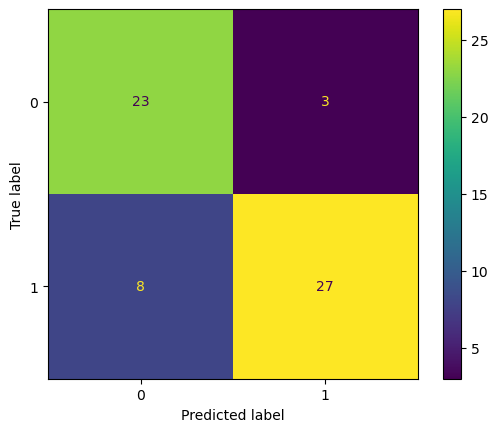

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels = lr.classes_)
disp =ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = lr.classes_)
disp.plot()
plt.show()

BQ1- (3pts) Based on the output of your classification report and confusion matrix, out
of all the times a patient should have been predicted as healthy, what percentage of
times were they correctly predicted? Show a simple calculation below (in your
notebook) since you already know the answer!


In [32]:
true_pos = 27
false_neg = 3
correctly_pred = true_pos / (true_pos+false_neg)
print("The Percetage of correctly predicted values is: {0:.2f}%".format(correctly_pred *100))

The Percetage of correctly predicted values is: 90.00%


BQ2-(3pts) Based on the output of your classification report and confusion matrix, out
of all the times a patient was predicted as sick, what percentage of times were they
correctly predicted? Show a simple calculation below (in your notebook) since you
already know the answer!


In [33]:
true_pos = 23
false_neg = 8
correctly_pred = true_pos / (true_pos + false_neg)
print("The Percetage of correctly predicted values is: {0:.2f}%".format(correctly_pred *100))

The Percetage of correctly predicted values is: 74.19%


BQ3-(1pt) If the recall is 1.0 and the dataset has 8 positive samples, how many
positive samples were correctly classified by the model?
ANSWER: Since the recall is equal to 1 this means that 8 samples were correctly classified by the model. 

BQ4- (2pts) Given that the recall is 0.4 when the dataset has 40 positive samples,
how many positive samples were correctly classified by the model? (MUST show
a simple calculation in your notebook for this one) 

In [34]:
actual_samp =40
recall =.4
positive_samps =recall*actual_samp
print(positive_samps)

16.0


BQ5- (1pt) If the recall is 0.0 and the dataset has 16 positive samples, how many
positive samples were correctly classified by the model? 
ANSWER:0, they would have all been classified incorrectly.